# Kaggle Titanic Challange


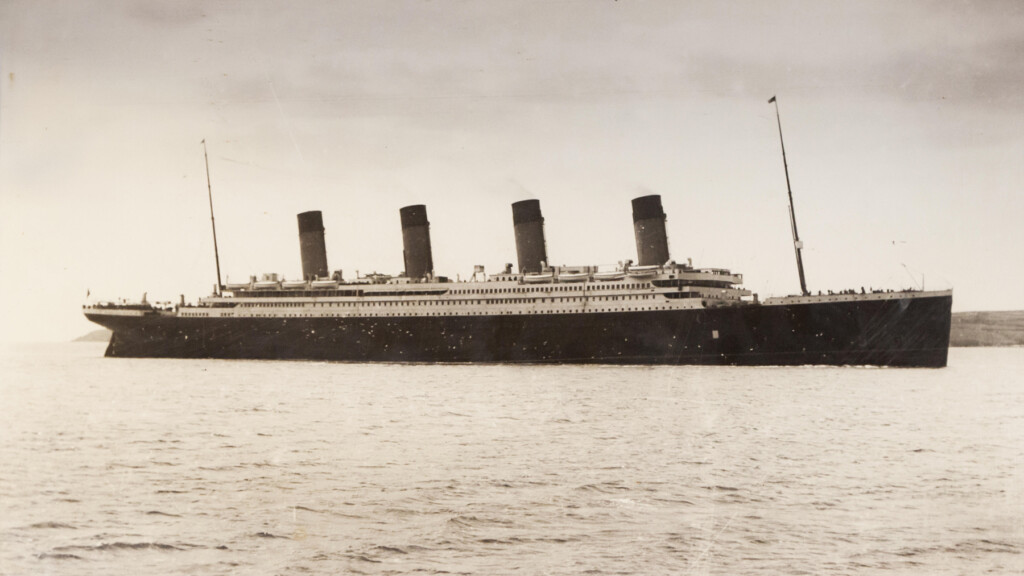

## Table of Content
(when opening as a jupyter notebook, click on the section in the table of content to directly go to the section)

* 1. [Introduction](#introduction)
* 2. [Data Understanding & Exploration](#data)
* 3. [Missing Data & Feature Creation](#missing)
* 4. [Model](#model)
* 5. [Modell evaluation & preparing for Kaggle](#kaggle) 
* 6. [Conclusion](#conclusion)

## 1. Introduction <a name="introduction"></a>

This Notebook will cover the Kaggle Titanic Challange. https://www.kaggle.com/c/titanic

Kaggle is a website that hosts a ton of machine learning competitions presented either by Kaggle itself or major companies. 
It is a great place to dig in some data sets and work on your skills in a great community with fun challanges. But you can also find plenty of data sets for your own self created projects.

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking at the time one of the deadliest of a single ship[a] and the deadliest peacetime sinking of a superliner or cruise ship to date.[4] With much public attention in the aftermath, the disaster has since been the material of many artistic works and a founding material of the disaster film genre. (Wikipedia)

- #### We are going to discover which passangers are likely to survive and which reasons increase the chance of surving.

If you dont want to scroll all the way down and are only intrested in the insights here is a copy of the conclusion section from the end

# 6. Conclusion (copy)

- Most of the passengers travel without parents or siblings, but the survival chance is higher when you travel with 1 sibling & 1 parent

- the most common fare is the cheapest ticket, but the higher fare has a slightly higher chance of survival 

-  The passengers are mainly  between 21-40 years old, Passangers between 20-36 are more likely to survive

- The most passengers embarked in Station S

- Most of the passengers travel in 3rd class and it seems that you chance of survival is higher when you traveled in 1st or 2nd class

- There were more male than female passengers on board and it is clearly that you chance of survival was much higher as a woman
    - Female
    - 1st class woman had 97% chance of survival
    - 2nd class woman had a 92% chance of survival 
    - 3rd class woman had a 50% chance of survival 
    - Male
    - 1st class man had a 37% chance of survival 
    - 2nd class man had a 16% chance of survival 
    - 3rd class man had a 14% chance of survival 
    
#### There is a latent connection between the sex and the survival. Woman especially in 1st and 2nd Class are more likely to survive.

Even though that your chance of survival is higher with a higher socio economic rank half of the woman in 3rd class survived as well.

The most common passenger is a 20-30 year old men who travels with no siblings and parents in the lowest fare in 3rd class and started the journey at the departure harbour S

So the most common passenger was doomed to death, a men between 20-30 in the 3rd class... 

#### When it comes to the model: 

- The model could be led by this variables and can tend to classify all middle aged men as not survived which leads to problems

- We have to check if it would be better to drop the Cabin variable cause it could be misinterpreted by the modell to fill all the missing values with U instead of a specific cabin

- It would be intresting to see if the accurency changes when we do dummies for the sex variable insteadf of transforming it to 0/1 for male and female in one column

- Next steps could also be to do some parameter tunning to improve the modell and the score 

- It would be intresting to see if the model accurency is better when we go for the easy way and just fill all the missing age data with the median age

We can see in the important feature plot:

That the title Mr. which stands for a middle aged male ist the most important factor followed by the Sex, this gives us a hint that the model could maybe be overfitted

The 3rd factor is the Class 3 which stands for the lowest socio economic status

followed by the female titles which tend to survive with a high chance 

followed by cabin U which is also a hint of wrong direction because we created that factor from all the missing data

We can see that perhaps the model is classifyng the way that it always says okay you are a woman in 1st or 2nd class that means survival, you are a men that means no survival even though there are men that survived and woman that died also in 1st & 2nd class so it could be that a 85% accurency is not that good as it seems 


In [698]:
# modules to handle data
import pandas as pd #data processing
import numpy as np #linear algebra

# visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [699]:
# load data
train = pd.read_csv('./titanic/train.csv')
test = pd.read_csv('./titanic/test.csv')

# save PassengerId for final submission
passengerId = test.PassengerId

# merge train and test
titanic = train.append(test, ignore_index=True)

# create indexes to separate data later on
train_idx = len(train)
test_idx = len(titanic) - len(test)

## 2. Data Understanding & Exploration <a name="data"></a>

In [804]:
# view the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_cat,Fare_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,Mr,Adult,Low_fare
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,Mrs,Adult,high_fare
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,Adult,median_fare
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,Mrs,Adult,high_fare
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,Mr,Adult,median_fare


In [701]:
# first overview of the data, type and missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


It looks like we have some missing data across some features. 

- The survied column has only 891 values, because we merged the test and training set, so no worries. 

- We also see that the Age column got a few missing values which are pretty easy to handle. 

- But we have to decide if we drop the Cabin column because there are a lot of missing values and it would be pretty difficult to fill in the values in a appropiate way, but before we drop values we have to find out how much information these features provide. 

- The Fare column has only 1 missing value & the embarked column 2, this is going to be solved very easily

So all in all can be pretty happy with this data set, it looks easy to handle the missing data.

In [702]:
# visualisation of the missing data
def plot_missing_data(dataset, title):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(title)
    sns.heatmap(dataset.isnull(), cbar = False)

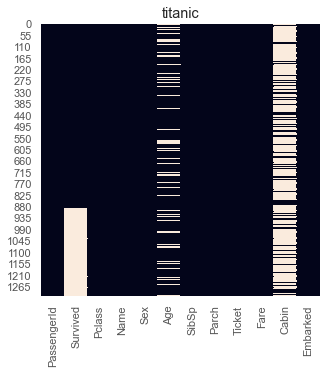

In [703]:
plot_missing_data(titanic, 'titanic')

In [704]:
# understand the nature of the data 
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [705]:
# how much people survived ? 

titanic['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [706]:
# percentage 
titanic['Survived'].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

We can clearly see that only 38% survived 

In [707]:
# visualize
def bar_chart(data, feature, stacked = True):
    survived = data[data['Survived'] == 1][feature].value_counts()
    dead = data[data['Survived'] == 0 ][feature].value_counts()
    df_survived_dead = pd.DataFrame([survived, dead])
    df_survived_dead.index = ['Passangers survived', 'Passangers died']
    ax = df_survived_dead.plot(kind = 'bar', stacked = stacked, figsize=(5,5))

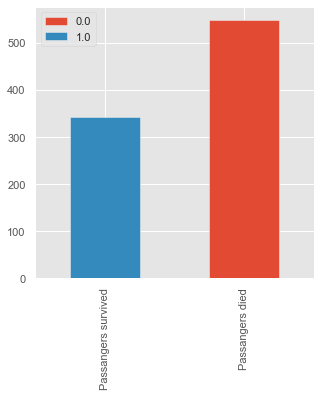

In [708]:
bar_chart(titanic, "Survived" )

In [709]:
#separate numeric columns to analyse numeric and categorical variables seperatly 
titanic.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [710]:
df_num = titanic[['Age','SibSp','Parch','Fare']]
df_cat = titanic[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


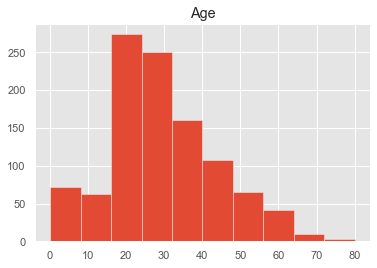

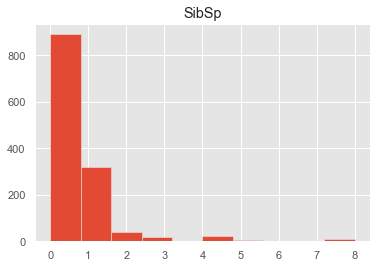

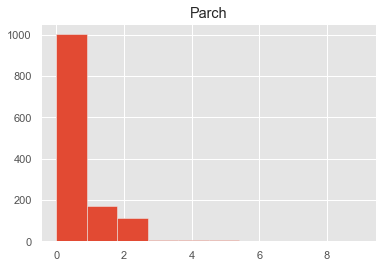

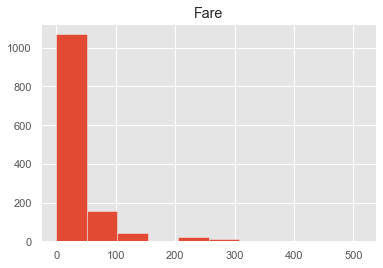

In [711]:
#quick look distributions for all numeric variables 
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()


- Most of the passangers travel without parents or siblings
- the most common fare is the cheapest ticket 
- only the age is a normal distribution and most of the passengers are 15-35 years old.
    
    We could transform the Sib, Parch and Fare column to a normal distribution

            Age     SibSp     Parch      Fare
Age    1.000000 -0.243699 -0.150917  0.178740
SibSp -0.243699  1.000000  0.373587  0.160238
Parch -0.150917  0.373587  1.000000  0.221539
Fare   0.178740  0.160238  0.221539  1.000000


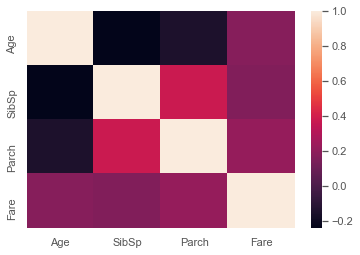

In [712]:
print(df_num.corr())
sns.heatmap(df_num.corr())

- We have to keep in mind that the column Sib & Parch is positive correlated and the age with sib and parch is negative correlated 

We could keep in mind that if we merge sib & parch to a new column which represents family size we could get rid of the correlation of these 2 variables

Lets have a look at the survival rates

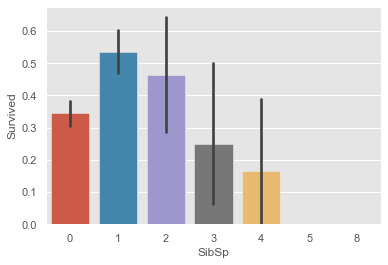

In [713]:
sns.barplot(x='SibSp', y='Survived', data=titanic)
plt.show()

- Most passangers travel without a Sibling, but when you travel with 1 Sibling the chance of survival is the highest followed by travelling with 2 Sibling

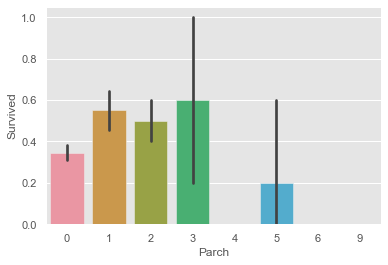

In [714]:
sns.barplot(x='Parch', y='Survived', data=titanic)
plt.show()

- It seems that passangers who are travelling with parents are more likely to survive

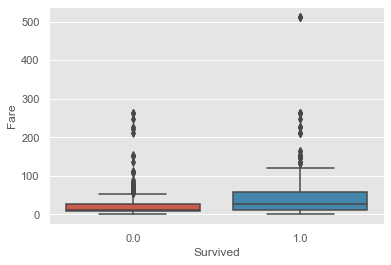

In [715]:
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()

The distribution is skewed and there are a lot of outliers but it seems that the fare has an influence on the survival rate, it could be similar to the cabin class which both indicates a higher socio economic status

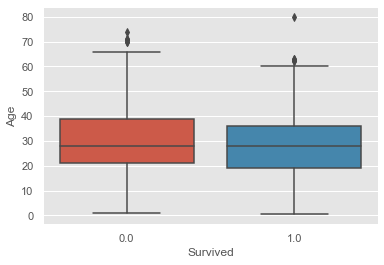

In [716]:
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()

- Passengers are mainly between 20-37 years and younger passengers tend to survive 

In [717]:
# compare survival across Age, SibSp, Parch, and Fare 
pd.pivot_table(titanic, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0.0,30.626179,22.117887,0.329690,0.553734
1.0,28.343690,48.395408,0.464912,0.473684


#### categorial variables

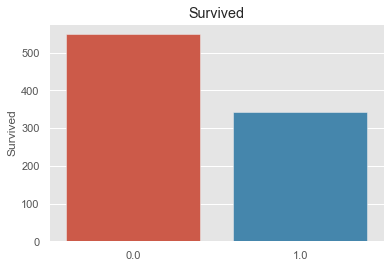

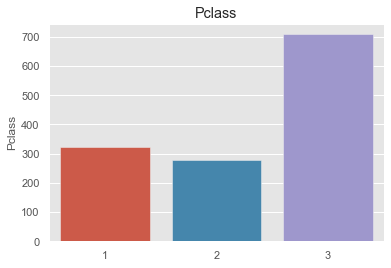

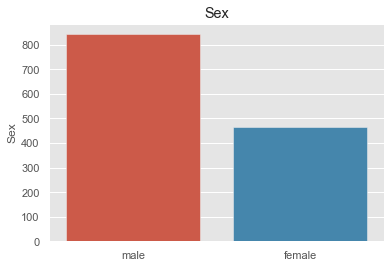

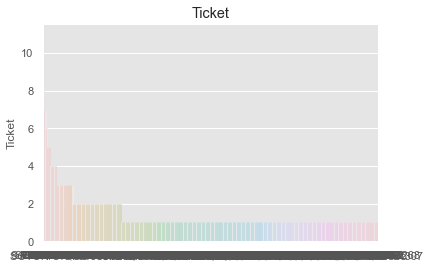

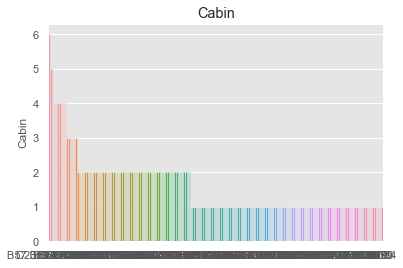

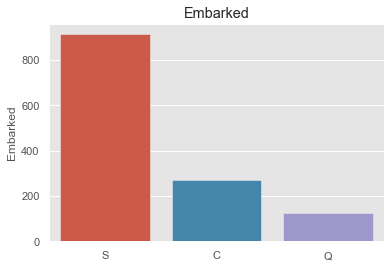

In [718]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()\
    

- Most of the people travlled in 3rd class
- There were more male than female passangers on board
- and the most passangers embarked in Station S

The Cabin & Ticket graph looks not so good, there could help to do some feature engineering 


In [719]:
# Comparing survival of the categorical variables 
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119
Sex       female  male
Survived              
0.0           81   468
1.0          233   109
Embarked   C   Q    S
Survived             
0.0       75  47  427
1.0       93  30  217


It looks like that the Class, which could also stand for the socio economic status is a meaningful feature when it comes to survival. 

It seems that another significant feature is the Sex. 

When you only look at the data it let us think that the port of depature has also an influence of the survial rate but it seems very uncommon and could be just a coincidence 

lets have a closer look to the class & sex when it comes to survival

In [720]:
# group by passenger class and sex
group_class_sex = titanic.groupby(['Pclass', 'Sex'])

# survival rates by class and sex
group_class_sex.Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

It seems that almost all the woman from the second and first class survived!
The 1st class woman have a 97% chance of survival but the same class man only 36%
The 2nd class woman have a 92% chance of survival but the same class man only 16%

the difference between man in 1st and 2nd class is huge.
also huge is the difference from woman in the 3rd class with a chance of only 50 % to the first or second class but a much bigger chance than any man

Its also intresting that the difference between man in 2nd and 3rd class is not very huge

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


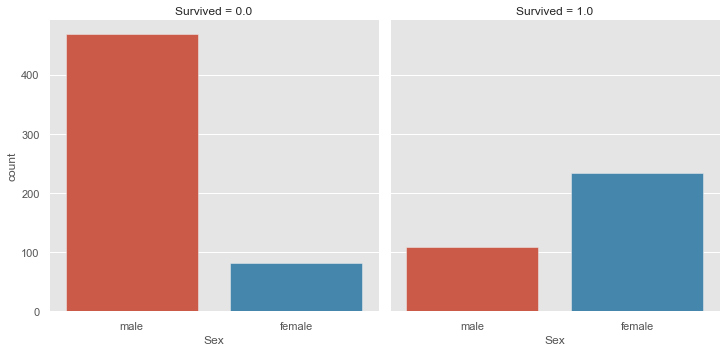

In [721]:
# plot by Survivded, Sex
survived_sex = sns.factorplot(x='Sex', col='Survived', data=titanic, kind='count')

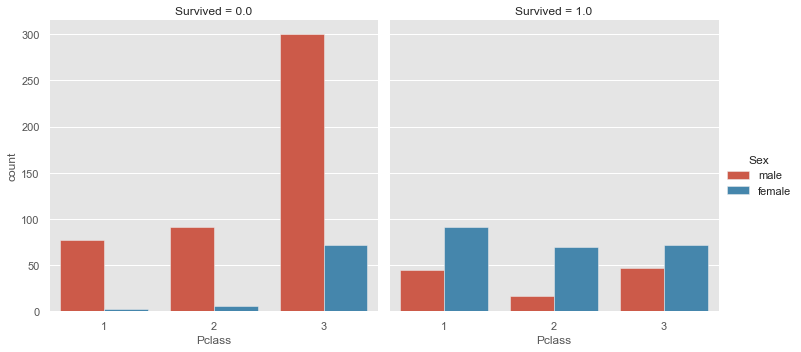

In [722]:
# plot by Pclass, Sex, Survived
class_sex_survived = sns.factorplot(x='Pclass', hue='Sex', col='Survived', data=titanic, kind='count')

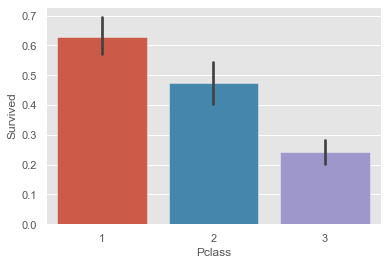

In [723]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.show()

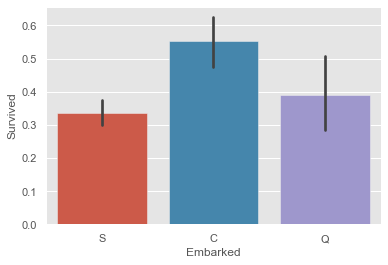

In [724]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.show()

In [725]:
# group by passenger class and sex
group_class_sex_age = titanic.groupby(['Pclass', 'Sex', 'Age'])

# survival rates by class and sex
group_class_sex_age.Survived.mean()

Pclass  Sex     Age 
1       female  2.0     0.0
                14.0    1.0
                15.0    1.0
                16.0    1.0
                17.0    1.0
                       ... 
3       male    60.5    NaN
                61.0    0.0
                65.0    0.0
                70.5    0.0
                74.0    0.0
Name: Survived, Length: 332, dtype: float64

We need to categorize the age first in Children, adult and senior to compare it correctly, so we will quickly check the age overall:

### Summery of the Exploration

We definitely see that there were inequality when it comes to survial & the socio economic status. But that could be because the 3rd class cabins were located more on the bottom side of the ship. So the people had a longer way up to the rescue boats and maybe it took longer for them to realize whats happening. 

We also can see that there was a woman & children first approach when it comes to distribute the live saving places in the rescue boats. Even the survival rate of the 3rd class woman was higher than the 1st class man which indicates that the social economic status was not live saving which is ethical right. But i know that the biggest problem when it comes to survival was that the titanic had not enough rescue boats for all passengers and the crew was not ready for this emergency

I think it is coincidence that there is a correlation between survival and the depature harbour

It seems that passengers with 1 sibling and 1 parent had a higher chance of survival

- ##### The most common passenger is a 20-30 year old men who travels with no siblings and parents in the lowest fare in 3rd class and started the journey at the departure harbour S

It also seems that a passangers with this characteristics has also the lowest surival rate...

## 3. Missing Data & Feature Engeneering <a name="missing"></a>

Now we look again at the missing data and try to find appropriate ways to fill the gaps.

In [726]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


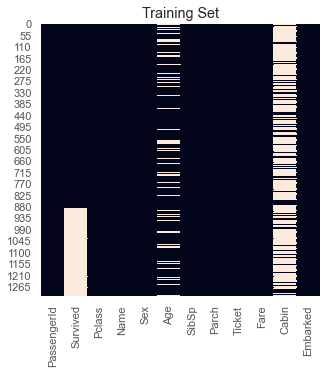

In [727]:
plot_missing_data(titanic, 'Training Set')

We will start with the age, we could easily fill in the median of the age column for the missing values but the title of the person tell´s us in a more preciuous way how old the person could be.

So we will write a function which extracts the title, we will group them and find the median age for the specific title of the person to fill in their missing ages

In [728]:
# create a new title column from the name column 
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [729]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [730]:
# show count of titles
print("There are {} unique titles.".format(titanic.Title.nunique()))

# show unique titles
print("\n", titanic.Title.unique())

There are 18 unique titles.

 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


In [731]:
# categorize the titles
categorized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [732]:
# map the categorized titles to the actual titles
titanic.Title = titanic.Title.map(categorized_titles)

# view value counts for the categorized titles
print(titanic.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


Perfect we reduced the amount of different titles to 6

In [733]:
# group by Sex, Pclass, and Title
grouped = titanic.groupby(['Sex','Pclass', 'Title'])

# view the median Age by the grouped features
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

As we can see is there are difference in age between mrs and miss, mr and officer and passangers with master are much younger than the overall median. So we found a more accurate way to fill in the missing values

In [734]:
# apply the grouped median value on the Age NaN
titanic.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

# view changes
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


For the Cabin we will fill the missing values with an U and categorize the different Cabins by there letter

In [735]:
# fill Cabin NaN with U for unknown
titanic.Cabin = titanic.Cabin.fillna('U')

In [736]:
# map first letter of cabin to itself
titanic.Cabin = titanic.Cabin.map(lambda x: x[0])

# view normalized count
titanic.Cabin.value_counts(normalize=True)

U    0.774637
C    0.071811
B    0.049656
D    0.035141
E    0.031322
A    0.016807
F    0.016043
G    0.003820
T    0.000764
Name: Cabin, dtype: float64

In [737]:
# view the total number
titanic.Cabin.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [738]:
#comparing surivial rate by cabin
pd.pivot_table(titanic,index='Survived',columns='Cabin', values = 'Name', aggfunc='count')

Cabin,A,B,C,D,E,F,G,T,U
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [739]:
titanic['Fare'].fillna(titanic['Fare'].median(), inplace = True)

In [740]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [741]:
# fill in the most common Embarked for the 2 missing values
titanic['Embarked'].fillna(titanic.mode()['Embarked'][0], inplace = True)

In [742]:
# checking for missing values in train

print('check the nan value in train data')
print(titanic.isnull().sum())

check the nan value in train data
PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
Title            0
dtype: int64


In [743]:
# convert the male and female groups to integer form
titanic.Sex = titanic.Sex.map({"male": 0, "female":1})

##### We will divide the age and fare column in categories that the model can use the information appropirate

In [744]:
# create categorie for age features
for data in titanic:
    titanic['Age_cat'] = pd.cut(titanic['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [745]:
## create categorie for fare features
for data in titanic:
    titanic['Fare_cat'] = pd.cut(titanic['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [746]:
# create dummy variables for categorical features
titanic_dummies = pd.get_dummies(titanic, columns = ['Pclass', 'Title', 'Cabin','Embarked','Age_cat', 'Fare_cat'])


In [747]:
titanic_dummies.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Pclass_1,...,Embarked_Q,Embarked_S,Age_cat_Children,Age_cat_Teenage,Age_cat_Adult,Age_cat_Elder,Fare_cat_Low_fare,Fare_cat_median_fare,Fare_cat_Average_fare,Fare_cat_high_fare
0,1,0.0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,...,0,1,0,0,1,0,1,0,0,0
1,2,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,...,0,0,0,0,1,0,0,0,0,1
2,3,1.0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,...,0,1,0,0,1,0,0,1,0,0
3,4,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,...,0,1,0,0,1,0,0,0,0,1
4,5,0.0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,...,0,1,0,0,1,0,0,1,0,0


In [748]:
#checking if everything is correct with the columns 
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PassengerId            1309 non-null   int64  
 1   Survived               891 non-null    float64
 2   Name                   1309 non-null   object 
 3   Sex                    1309 non-null   int64  
 4   Age                    1309 non-null   float64
 5   SibSp                  1309 non-null   int64  
 6   Parch                  1309 non-null   int64  
 7   Ticket                 1309 non-null   object 
 8   Fare                   1309 non-null   float64
 9   Pclass_1               1309 non-null   uint8  
 10  Pclass_2               1309 non-null   uint8  
 11  Pclass_3               1309 non-null   uint8  
 12  Title_Master           1309 non-null   uint8  
 13  Title_Miss             1309 non-null   uint8  
 14  Title_Mr               1309 non-null   uint8  
 15  Titl

In [749]:
# drop some redundant columns
titanic_dummies.drop(['Name', 'Ticket','Age','Fare'], axis=1, inplace=True)

In [750]:
titanic_dummies.columns

Index(['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_cat_Children',
       'Age_cat_Teenage', 'Age_cat_Adult', 'Age_cat_Elder',
       'Fare_cat_Low_fare', 'Fare_cat_median_fare', 'Fare_cat_Average_fare',
       'Fare_cat_high_fare'],
      dtype='object')

In [751]:
print(titanic_dummies.columns.tolist())

['PassengerId', 'Survived', 'Sex', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Age_cat_Children', 'Age_cat_Teenage', 'Age_cat_Adult', 'Age_cat_Elder', 'Fare_cat_Low_fare', 'Fare_cat_median_fare', 'Fare_cat_Average_fare', 'Fare_cat_high_fare']


In [752]:
titanic_dummies.head()

,PassengerId,Survived,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,...,Embarked_Q,Embarked_S,Age_cat_Children,Age_cat_Teenage,Age_cat_Adult,Age_cat_Elder,Fare_cat_Low_fare,Fare_cat_median_fare,Fare_cat_Average_fare,Fare_cat_high_fare
0,1,0.0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2,1.0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,1.0,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,4,1.0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,5,0.0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [753]:
#finally we can seperate the data sets again

In [754]:
# create train and test data
train = titanic_dummies[ :train_idx]
test = titanic_dummies[test_idx: ]

# convert Survived back to int
#train.Survived = train.Survived.astype(int)

In [755]:
train.head()

,PassengerId,Survived,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,...,Embarked_Q,Embarked_S,Age_cat_Children,Age_cat_Teenage,Age_cat_Adult,Age_cat_Elder,Fare_cat_Low_fare,Fare_cat_median_fare,Fare_cat_Average_fare,Fare_cat_high_fare
0,1,0.0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1,2,1.0,1,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,3,1.0,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
3,4,1.0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,5,0.0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [756]:
test.head()

,PassengerId,Survived,Sex,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,...,Embarked_Q,Embarked_S,Age_cat_Children,Age_cat_Teenage,Age_cat_Adult,Age_cat_Elder,Fare_cat_Low_fare,Fare_cat_median_fare,Fare_cat_Average_fare,Fare_cat_high_fare
891,892,NaN,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
892,893,NaN,1,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
893,894,NaN,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
894,895,NaN,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
895,896,NaN,1,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [757]:
train.drop(['PassengerId'], axis=1, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [758]:
test.drop(['Survived'], axis=1, inplace=True)

Before we start Modelling we take a look at the correlations again

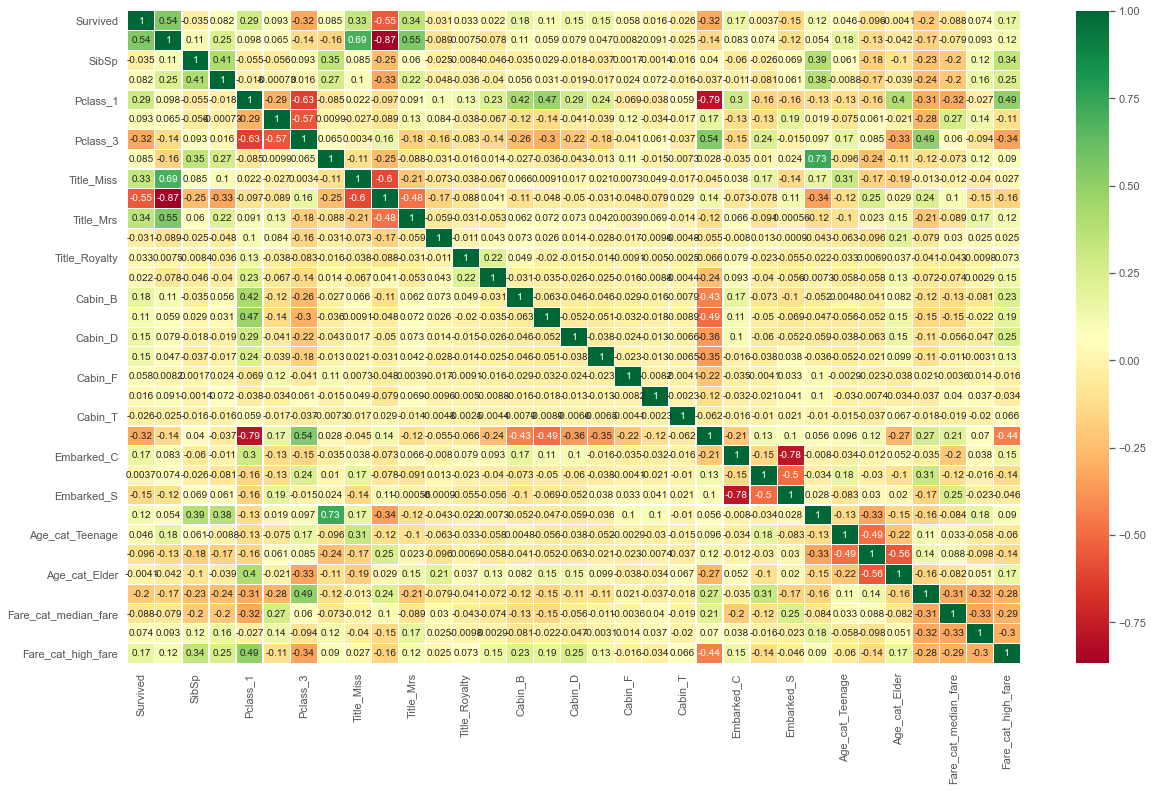

In [759]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

- Interpreting Correlation: features that are highly correlated containing highly similar information and there is little variance in the different features information so its rendundant 

## 4. Model <a name="model"></a>

We got a supervised classification and regression Problem so the type of modell we use needs to fit to the problem. The following models could fit:

- Logistic Regression
- KNN
- Support Vector Machines
- Naive Bayes classifier
- Decision Tree
- Random Forrest
- Linear Discriminant Analysis
- Ada Boost Classifier
- Gradient Boosting Classifier

In [760]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix


x = train.drop("Survived",axis=1)
y = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

X_train.shape, X_test.shape,y_train.shape,y_test.shape

((623, 32), (268, 32), (623,), (268,))

### Logistic Regression

The accuracy of the Logistic Regression is 82.46


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


The cross validated score for Logistic Regression is: 83.05


Text(0.5, 1.05, 'Confusion_matrix')

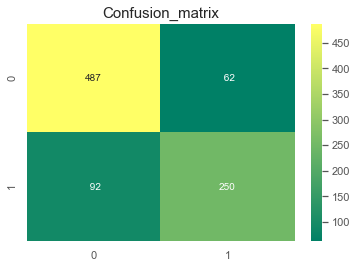

In [784]:
# machine learning
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()

model.fit(X_train,y_train)

prediction_lr=model.predict(X_test)

print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=32) # k=10, split the data into 10 equal parts

result_lr=cross_val_score(model,x,y,cv=10,scoring='accuracy')

print('The cross validated score for Logistic Regression is:',round(result_lr.mean()*100,2))

y_pred = cross_val_predict(model,x,y_pred,cv=10)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion_matrix', y=1.05, size=15)

### Random Forest Classifier

The accuracy of the Random Forest Classifier is 82.84


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


The cross validated score for Random Forest Classifier is: 83.17


Text(0.5, 1.05, 'Confusion_matrix')

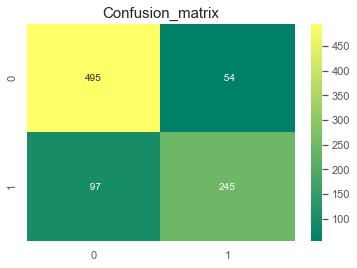

In [785]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini', n_estimators=650,
                             min_samples_split=10,min_samples_leaf=4,
                             max_features='auto',oob_score=True,
                             random_state=None,n_jobs=-1)

model.fit(X_train,y_train)

prediction_rm=model.predict(X_test)

print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=32) # k=10, split the data into 10 equal parts

result_rm=cross_val_score(model,x,y,cv=10,scoring='accuracy')

print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))

y_pred = cross_val_predict(model,x,y,cv=10)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion_matrix', y=1.05, size=15)

### SVM

The accuracy of the Support Vector Machines Classifier is 83.58


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


The cross validated score for Support Vector Machines Classifier is: 83.05


Text(0.5, 1.05, 'Confusion_matrix')

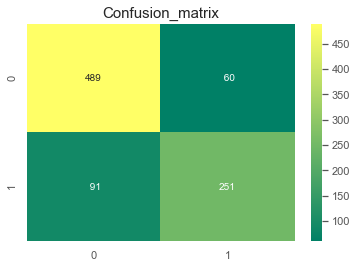

In [786]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

model = SVC()

model.fit(X_train,y_train)

prediction_svm=model.predict(X_test)

print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=32) # k=10, split the data into 10 equal parts

result_svm=cross_val_score(model,x,y,cv=10,scoring='accuracy')

print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))

y_pred = cross_val_predict(model,x,y,cv=10)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion_matrix', y=1.05, size=15)

### KNN

The accuracy of the K Nearst Neighbors Classifier is 82.46
The cross validated score for K Nearest Neighbors Classifier is: 80.92


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Text(0.5, 1.05, 'Confusion_matrix')

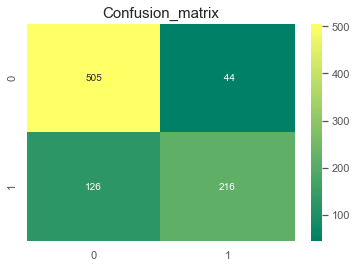

In [787]:
##knn
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)

model.fit(X_train,y_train)

prediction_knn=model.predict(X_test)

print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=32) # k=10, split the data into 10 equal parts

result_knn=cross_val_score(model,x,y,cv=10,scoring='accuracy')

print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))

y_pred = cross_val_predict(model,x,y,cv=10)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion_matrix', y=1.05, size=15)

### Gaussian Naive Bayes

The accuracy of the Gaussian Naive Bayes Classifier is 76.12
The cross validated score for Gaussian Naive Bayes classifier is: 74.08


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Text(0.5, 1.05, 'Confusion_matrix')

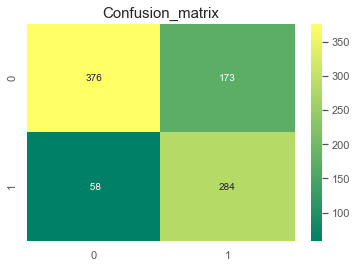

In [788]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

model= GaussianNB()

model.fit(X_train,y_train)

prediction_gnb=model.predict(X_test)

print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=32) # k=10, split the data into 10 equal parts

result_gnb=cross_val_score(model,x,y,cv=10,scoring='accuracy')

print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))

y_pred = cross_val_predict(model,x,y,cv=10)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap="summer")

plt.title('Confusion_matrix', y=1.05, size=15)

### Gradient Boosting Classifier

The accuracy of the Gradient Boosting Classifier is 81.34


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Text(0.5, 1.05, 'Confusion_matrix')

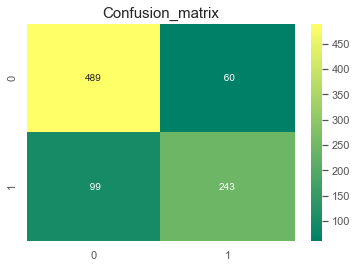

In [789]:
from sklearn.ensemble import GradientBoostingClassifier

model= GradientBoostingClassifier()

model.fit(X_train,y_train)

prediction_gbc=model.predict(X_test)

print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))

kfold = KFold(n_splits=10, random_state=32) # k=10, split the data into 10 equal parts

result_gbc=cross_val_score(model,x,y,cv=10,scoring='accuracy')

y_pred = cross_val_predict(model,x,y,cv=10)

sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='3.0f',cmap='summer')

plt.title('Confusion_matrix', y=1.05, size=15)

## 5. Modell evaluation & Preparing for Kaggle <a name="kaggle"></a>

In [790]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Gradient Decent'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(), 
              result_rm.mean(), result_gnb.mean(),
              result_gbc.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,0.831685
0,Support Vector Machines,0.830549
2,Logistic Regression,0.830537
5,Gradient Decent,0.822709
1,KNN,0.809226
4,Naive Bayes,0.740811


We are going to select the Random Forest. At this point we could improve our modell.

### Preparing for Kaggle

In [791]:
train_X = train.drop("Survived", axis=1)
train_Y=train["Survived"]
test_X  = test.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 32), (891,), (418, 32))

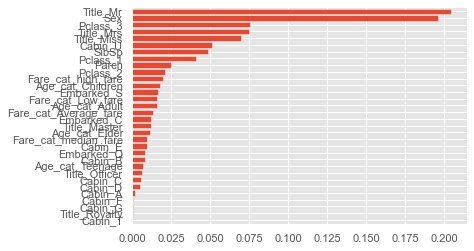

In [802]:
model = RandomForestClassifier(criterion='gini', n_estimators=650,
                             min_samples_split=10,min_samples_leaf=4,
                             max_features='auto',oob_score=True,
                             random_state=None,n_jobs=-1)

model.fit(train_X,train_Y)

prediction_submission=model.predict(test_X)
model.score(train_X,train_Y)
acc_random_forest = round(model.score(train_X, train_Y) * 100, 2)

acc_random_forest
"Important features"
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)





In [793]:
model_SVC = SVC()

model_SVC.fit(train_X,train_Y)

prediction_svm=model.predict(test_X)
model_SVC.score(train_X,train_Y)

0.8473625140291807

In [794]:
prediction_submission = prediction_submission.astype(int)

In [795]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction_submission})

In [796]:
submission.to_csv('./titanic_pred.csv', index = False)

In [797]:
prediction_svm = prediction_svm.astype(int)

In [798]:
submission2 = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction_svm})

In [799]:
submission2.to_csv('./titanic_pred2.csv', index = False)

## 6. Conclusion <a name="conclusion"></a>

- Most of the passangers travel without parents or siblings, but the survival chance is higher when you travel with 1 sibling & 1 parent

- the most common fare is the cheapest ticket, but the higher fare has a slightly higher chance of survival 

-  The passengers are mainly  between 21-40 years old, Passangers between 20-36 are more likely to survive

- The most passangers embarked in Station S

- Most of the passangers travel in 3rd class and it seems that you chance of survival is higher when you traveled in 1st or 2nd class

- There were more male than female passengers on board and it is clearly that you chance of survival was much higher as a woman
    - Female
    - 1st class woman had 97% chance of survival
    - 2nd class woman had a 92% chance of survival 
    - 3rd class woman had a 50% chance of survival 
    - Male
    - 1st class man had a 37% chance of survival 
    - 2nd class man had a 16% chance of survival 
    - 3rd class man had a 14% chance of survival 
    
#### There is a latent connection between the sex and the survival. Woman especially in 1st and 2nd Class are more likely to survive.

Even though that your chance of survival is higher with a higher socio economic rank half of the woman in 3rd class survived as well.

The most common passenger is a 20-30 year old men who travels with no siblings and parents in the lowest fare in 3rd class and started the journey at the departure harbour S

So the most common passenger was doomed to death, a men between 20-30 in the 3rd class... 

#### When it comes to the modell: 

- The modell could be led by this variables and can tend to classify all middle aged men as not survived which leads to problems

- We have to check if it would be better to drop the Cabin variable cause it could be misinterpreted by the modell to fill all the missing values with U instead of a specific cabin

- It would be intresting to see if the accurency changes when we do dummies for the sex variable insteadf of transforming it to 0/1 for male and female in one column

- Next steps could also be to do some parameter tunning to improve the modell and the score 

- It would be intresting to see if the model accurency is better when we go for the easy way and just fill all the missing age data with the median age

We can see in the important feature plot:

That the title Mr. which stands for a middle aged male ist the most important factor followed by the Sex, this gives us a hint in which way the model learned in the wrong direction

The 3rd factor is the Class 3 which stands for the lowest socio economic status

followed by the female titles which tend to survive with a high chance 

followed by cabin U which is also a hint of wrong direction because we created that factor from all the missing data

We can see that perhaps the model is classifyng the way that it always says okay you are a woman in 1st or 2nd class that means survival, you are a men that means no survival even though there are men that survived and woman that died also in 1st & 2nd class so it could be that a 85% accurency is not that good as it seems 

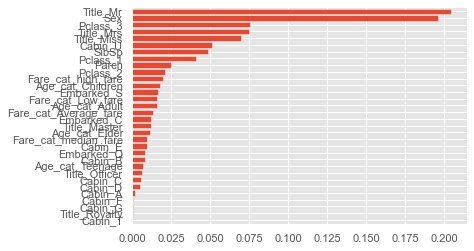

In [803]:
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)